1. Task To Do: • Implement the Logistic Function by completing the code or writing your own function. • Make sure you pass the test case.



In [1]:
def logistic_function(x):
    """
    Computes the logistic (sigmoid) function applied to any value of x.

    Arguments:
    x: scalar or numpy array of any size.

    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


In [2]:
import numpy as np

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

test_logistic_function()


All tests passed!


2. Task To Do:
• Implement the Log - loss Function by completing the code or writing your own function.
• Make sure you pass the test case.

In [4]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ∈ {0,1}
    and predicted value y_pred ∈ (0,1).

    Arguments:
    y_true (scalar): true target value {0 or 1}
    y_pred (scalar): predicted target value {0-1}

    Returns:
    loss (float): loss/error value
    """
    import numpy as np

    if y_pred == 0 or y_pred == 1:
        raise ValueError("log(0) is undefined")

    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)


    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss


In [7]:

y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')


log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [8]:

def log_loss(y_true, y_pred):
    import numpy as np
    if (y_true == 1 and y_pred == 1) or (y_true == 0 and y_pred == 0):
        return 0.0
    if y_pred == 0 or y_pred == 1:
        raise ValueError("log(0) is undefined")
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def test_log_loss():
    import numpy as np

    y_true, y_pred = 1, 1
    assert np.isclose(log_loss(y_true, y_pred), 0.0)

    y_true, y_pred = 0, 0
    assert np.isclose(log_loss(y_true, y_pred), 0.0)

    y_true, y_pred = 1, 0
    try:
        log_loss(y_true, y_pred)
    except ValueError:
        pass

    y_true, y_pred = 0, 1
    try:
        log_loss(y_true, y_pred)
    except ValueError:
        pass

    y_true, y_pred = 1, 0.8
    expected = -(np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected, atol=1e-6)

    y_true, y_pred = 0, 0.2
    expected = -(np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected, atol=1e-6)

    print("All tests passed!")


test_log_loss()


All tests passed!


3. Task To Do: • Implement the Cost Function by completing the code or writing your own function. • Make sure you pass the test case.

In [9]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)

    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)

    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np

    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    n = len(y_true)

    loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    cost = np.sum(loss_vec) / n

    return cost


In [10]:
import numpy as np

def test_cost_function():
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                     -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                     -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

    result = cost_function(y_true, y_pred)
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

test_cost_function()


Test passed for simple case!


4. Task To Do:
• Implement the vectorized cost function costfunction logreg Function by completing the
code or writing your own function.
• Make sure you pass the test case.

In [11]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    """
    Computes logistic regression cost.
    y: true labels (0 or 1)
    y_pred: predicted probabilities
    """
    m = y.shape[0]
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def costfunction_logreg(X, y, w, b):
    """
    Computes cost function for logistic regression (vectorized)
    X: m x n feature matrix
    y: m-dimensional vector of labels
    w: n-dimensional vector of weights
    b: bias
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    z = np.dot(X, w) + b

    y_pred = sigmoid(z)

    cost = cost_function(y, y_pred)
    return cost


In [12]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

cost = costfunction_logreg(X, y, w, b)
print(f"cost for logistic regression = {cost}")


cost for logistic regression = 5.500008350784906


5. Task To Do: • Implement the compute gradient Function by completing the code or writing your own function. • Make sure you pass the test case.

In [13]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function w.r.t weights and bias for logistic regression.
    Args:
        X: (n, d) feature matrix
        y: (n,) true labels (0 or 1)
        w: (d,) weights
        b: bias
    Returns:
        grad_w: (d,) gradient w.r.t weights
        grad_b: scalar gradient w.r.t bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b


In [14]:

X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


6. Task To Do: • Implement the gradient descent Function by completing the code or writing your own function. • Make sure you pass the test case.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    m = y.shape[0]
    return -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_gradient(X, y, w, b):
    m, n = X.shape
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    error = y_pred - y
    grad_w = np.dot(X.T, error) / m
    grad_b = np.sum(error) / m
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):

        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        y_pred = sigmoid(np.dot(X, w) + b)
        cost = cost_function(y, y_pred)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [17]:

X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693


In [18]:
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

    assert len(cost_history) == n_iter, "Cost history length does not match number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed!")

test_gradient_descent()


All tests passed!


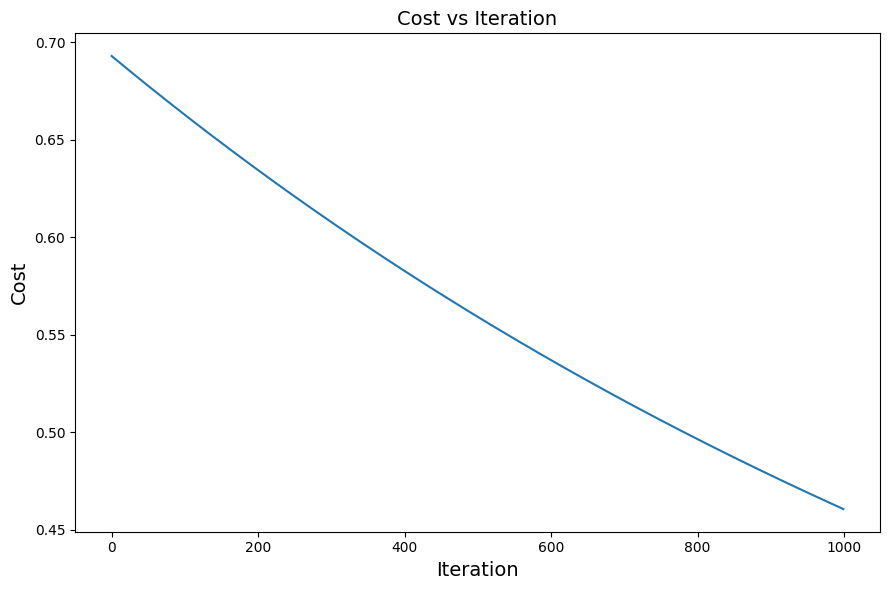

In [19]:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


7. Task To Do: • Implement the prediction Function by completing the code or writing your own function. • Make sure you pass the test case.

In [21]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features using logistic regression.
    Args:
        X (ndarray, shape (n,d)): Test features
        w (ndarray, shape (d,)): Learned weights
        b (float): Learned bias
        threshold (float, optional): Classification threshold. Default is 0.5
    Returns:
        y_pred (ndarray, shape (n,)): Binary class predictions (0 or 1)
    """

    z = np.dot(X, w) + b
    y_test_prob = sigmoid(z)

    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


In [22]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])

    y_pred = prediction(X_test, w_test, b_test, threshold)

    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

test_prediction()


Test passed!



8. Task To Do: • Implement evaluate classification Function by completing the code or writing your own function. • Make sure you pass the test case.



In [23]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes confusion matrix, precision, recall, and F1-score for binary classification.
    Args:
        y_true (ndarray, shape (n,)): Ground truth labels (0 or 1)
        y_pred (ndarray, shape (n,)): Predicted labels (0 or 1)
    Returns:
        metrics (dict): Dictionary containing confusion matrix, precision, recall, and F1-score
    """

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0


    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [24]:
# Test case
y_true = np.array([1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([1, 0, 0, 0, 1, 1, 1])

metrics = evaluate_classification(y_true, y_pred)

print("Confusion Matrix:\n", metrics["confusion_matrix"])
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1-Score:", metrics["f1_score"])


Confusion Matrix:
 [[2 1]
 [1 3]]
Precision: 0.75
Recall: 0.75
F1-Score: 0.75


In [26]:
# Load dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

In [27]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [28]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


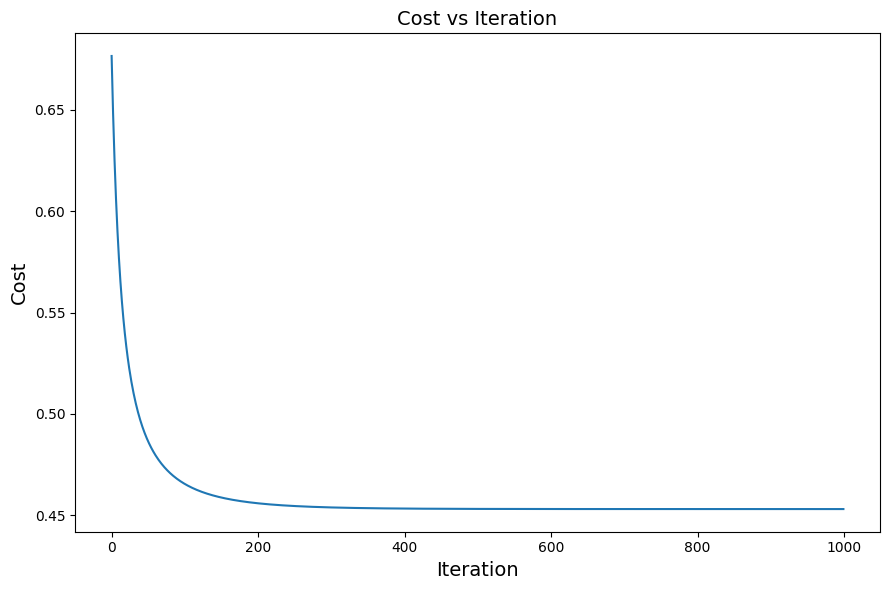

In [31]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146



Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


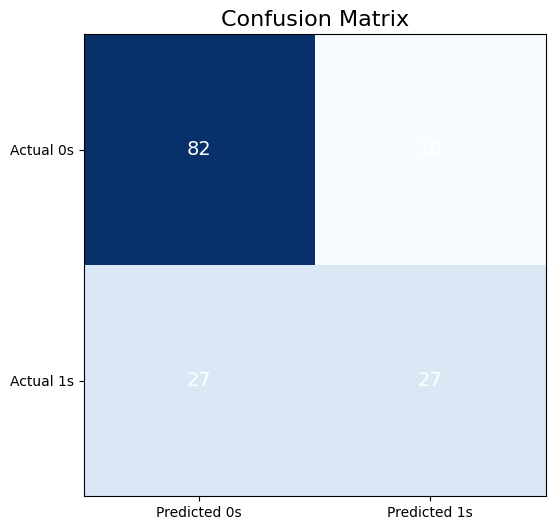

In [36]:
import numpy as np
import matplotlib.pyplot as plt

test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

metrics = evaluate_classification(y_test, y_test_pred)

confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white', fontsize=14)

plt.title("Confusion Matrix", fontsize=16)
plt.show()
